In [0]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [74]:
print("Shape of X_train:",X_train.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [0]:
#Converting 28*28 to 784
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

In [76]:
print("After Reshaping")
print("Shape of X_train:",X_train.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_test:",y_test.shape)

After Reshaping
Shape of X_train: (60000, 784)
Shape of y_train: (60000,)
Shape of X_test: (10000, 784)
Shape of y_test: (10000,)


In [77]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
#normalizing 
#Values are from  0 to 255 
#max=255,min=0
#X => (X - Xmin)/(Xmax-Xmin) = X/255
X_train=X_train/255
X_test=X_test/255

In [79]:
print("After Normalizing")
print(X_train[0])

After Normalizing
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.  

In [80]:
print("Y label of first image is",y_train[0])

Y label of first image is 5


In [81]:
#one hot encoding
y_train=np_utils.to_categorical(y_train,num_classes=10)
y_test=np_utils.to_categorical(y_test,num_classes=10)
print("After one hot encoding")
print("Y label of first image :",y_train[0])

After one hot encoding
Y label of first image : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [82]:
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of y_train (60000, 10)
Shape of y_test (10000, 10)


In [0]:
from keras.models import Sequential
from keras.layers import Dense,Activation

In [0]:
output_dim=y_train.shape[1]
input_dim=X_train.shape[1]
batch_size=128
n_epoch=20

In [85]:
model=Sequential()
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_data=(X_test, y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 53us/step - loss: 1.2635 - acc: 0.7109 - val_loss: 0.8046 - val_acc: 0.8385
Epoch 2/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.7122 - acc: 0.8423 - val_loss: 0.6053 - val_acc: 0.8621
Epoch 3/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.5854 - acc: 0.8590 - val_loss: 0.5249 - val_acc: 0.8744
Epoch 4/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.5244 - acc: 0.8691 - val_loss: 0.4795 - val_acc: 0.8824
Epoch 5/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.4871 - acc: 0.8753 - val_loss: 0.4498 - val_acc: 0.8879
Epoch 6/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.4614 - acc: 0.8802 - val_loss: 0.4286 - val_acc: 0.8906
Epoch 7/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.4423 - acc: 0.8839 - val_loss: 0.4126 - val_acc

Test score: 0.335577474963665
Test accuracy: 0.9096


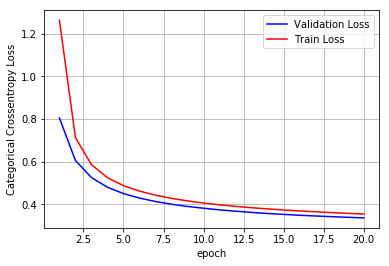

In [86]:
score=model.evaluate(X_test,y_test,verbose=0)
x = list(range(1,n_epoch+1))
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

MLP + Sigmoid activation + SGDOptimizer

In [87]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_44 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_45 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [88]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, y_train, batch_size=batch_size, epochs=50, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 62us/step - loss: 2.2703 - acc: 0.2248 - val_loss: 2.2202 - val_acc: 0.4124
Epoch 2/50
60000/60000 [==============================] - 3s 44us/step - loss: 2.1762 - acc: 0.4666 - val_loss: 2.1183 - val_acc: 0.5586
Epoch 3/50
60000/60000 [==============================] - 3s 42us/step - loss: 2.0570 - acc: 0.5829 - val_loss: 1.9720 - val_acc: 0.6160
Epoch 4/50
60000/60000 [==============================] - 3s 44us/step - loss: 1.8854 - acc: 0.6353 - val_loss: 1.7685 - val_acc: 0.6438
Epoch 5/50
60000/60000 [==============================] - 3s 44us/step - loss: 1.6629 - acc: 0.6716 - val_loss: 1.5271 - val_acc: 0.6961
Epoch 6/50
60000/60000 [==============================] - 3s 43us/step - loss: 1.4282 - acc: 0.7001 - val_loss: 1.3018 - val_acc: 0.7131
Epoch 7/50
60000/60000 [==============================] - 3s 43us/step - loss: 1.2276 - acc: 0.7244 - val_loss: 1.1251 - val_acc

Test score: 0.31564796745181084
Test accuracy: 0.9094


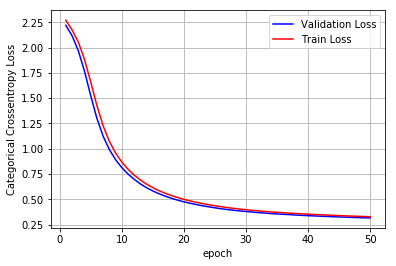

In [89]:
score = model_sigmoid.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,51))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

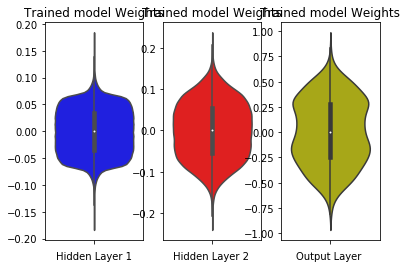

In [90]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

MLP + Sigmoid activation + ADAM

In [91]:
model_sigmoid=Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))
model_sigmoid.summary()
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, y_train, batch_size=256, epochs=25, verbose=1, validation_data=(X_test, y_test))




Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_47 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_48 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 3s 51us/step - loss: 0.7313 - acc: 0.8135 - val_loss: 0.3043 - val_acc: 0.9176
Epoch 2/25
60000/60000 [==============================] - 2s 29us/step - loss: 0.2715 - acc: 0.9226 - val_loss: 0.2322 - val_acc: 0.9318
Epoch 3/25
60000/60000 [=============================

Test score: 0.0622804889400315
Test accuracy: 0.9831


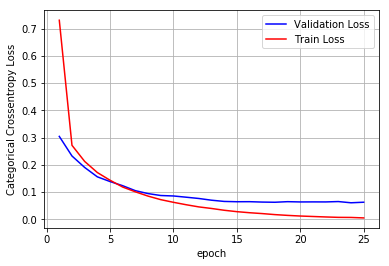

In [92]:
score = model_sigmoid.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,26))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

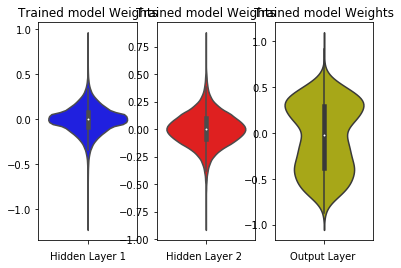

In [93]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

MLP + ReLU +SGD

In [94]:
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(in). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_50 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_51 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [95]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, y_train, batch_size=256, epochs=n_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 47us/step - loss: 1.1173 - acc: 0.6885 - val_loss: 0.5812 - val_acc: 0.8474
Epoch 2/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.4966 - acc: 0.8664 - val_loss: 0.4063 - val_acc: 0.8881
Epoch 3/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.3910 - acc: 0.8895 - val_loss: 0.3445 - val_acc: 0.9028
Epoch 4/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.3425 - acc: 0.9023 - val_loss: 0.3093 - val_acc: 0.9113
Epoch 5/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.3117 - acc: 0.9102 - val_loss: 0.2866 - val_acc: 0.9174
Epoch 6/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.2891 - acc: 0.9163 - val_loss: 0.2686 - val_acc: 0.9221
Epoch 7/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.2714 - acc: 0.9215 - val_loss: 0.2529 - val_acc

Test score: 0.16679219267740847
Test accuracy: 0.9493


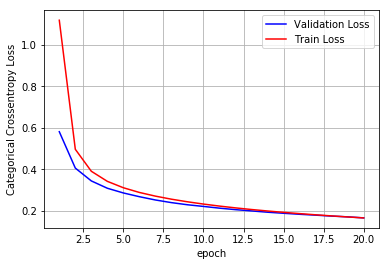

In [96]:
score = model_relu.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

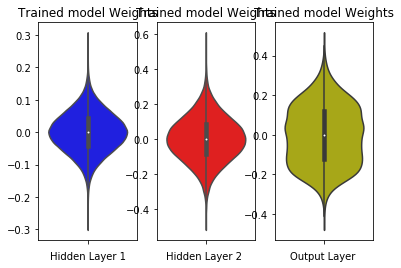

In [97]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

MLP + ReLU + ADAM

In [102]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_data=(X_test, y_test))

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_56 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_57 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.2348 - acc: 0.9308 - val_loss: 0.1139 - val_acc: 0.9659
Epoch 2/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0872 - acc: 0.9742 - val_loss: 0.0903 - val_acc: 0.9715
Epoch 3/20
60000/60000 [========================

Test score: 0.08292084760254202
Test accuracy: 0.9808


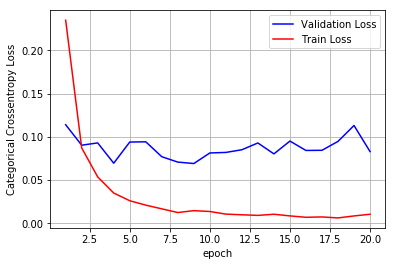

In [103]:
score = model_relu.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Hyper-parameter tuning of Keras models using Sklearn

In [0]:
from keras.optimizers import Adam,RMSprop,SGD
def best_hyperparameters(activ):

    model = Sequential()
    model.add(Dense(512, activation=activ, input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
    model.add(Dense(128, activation=activ, kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [106]:

activ = ['sigmoid','relu']

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=best_hyperparameters, epochs=n_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(activ=activ)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [107]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.977750 using {'activ': 'relu'}
0.975267 (0.001621) with: {'activ': 'sigmoid'}
0.977750 (0.001246) with: {'activ': 'relu'}
